In [39]:
import pandas as pd
import numpy as np
import nltk
import re 

In [40]:
pd.read_csv('spam.csv',encoding = 'latin-1')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [41]:
# Loading dataset
df = pd.read_csv('spam.csv',encoding = 'latin-1')

#dropping Unwanted columns
df.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1,inplace=True)

#Renaming column
df.columns = ['Class','Message']
df.head(5)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
# Basic analysis

In [43]:
df['Len'] = [len(x) for x in df.Message]
df.head()

,Class,Message,Len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [44]:
df.describe()

,Len
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [45]:
df.groupby('Class').describe()

Len                                                         
        count        mean        std   min    25%    50%    75%    max
Class                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [46]:
df.shape

(5572, 3)

In [47]:
df['Class'].value_counts() / df.shape[0]*100

ham     86.593683
spam    13.406317
Name: Class, dtype: float64

### Word cloud

In [48]:
stopwords_list = nltk.corpus.stopwords.words('english')  # stop words list 
tokenizer = nltk.word_tokenize # to tokenize

In [49]:
from collections import Counter

In [50]:
common_words = {'words':[],'count':[]}

for sent in df['Message']:
    tokens = tokenizer(sent)
    # print(tokens)
    counts = Counter(tokens)
    # print(counts)
    common_words['words'].append(counts.most_common(1)[0][0])
    common_words['count'].append(counts.most_common(1)[0][1])

    # print('===========================================================================')

In [51]:
common_words_df = pd.concat([df,pd.DataFrame(common_words)],axis=1)
common_words_df

,Class,Message,Len,words,count
0,ham,"Go until jurong point, crazy.. Available only ...",111,...,2
1,ham,Ok lar... Joking wif u oni...,29,...,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,to,3
3,ham,U dun say so early hor... U c already then say...,49,U,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,he,2
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,.,3
5568,ham,Will Ì_ b going to esplanade fr home?,37,Will,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,Pity,1
5570,ham,The guy did some bitching but I acted like i'd...,125,The,1


In [52]:
# ! pip install wordcloud
import wordcloud as wc

world_cloud = wc.WordCloud().generate_from_text(' '.join(common_words_df.words))

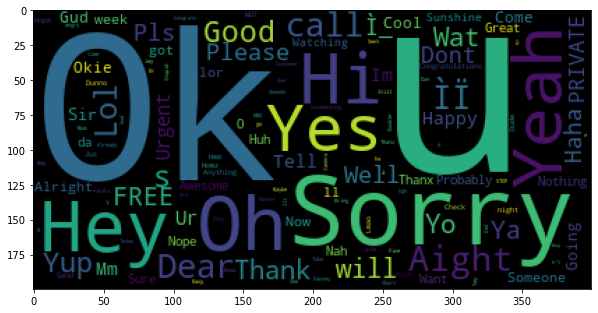

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize =(10,10))
plt.imshow(world_cloud)

In [54]:
# Main Analysis

In [55]:
df = df.drop(['Len'],axis=1)
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:

# converting all to lower and removing puncuation
def convert(i):
    clean_text = re.sub(r'[^a-zA-Z0-9]',' ', i.lower())
    return clean_text

df.Message = df.Message.apply(convert)
df.Message



0       go until jurong point  crazy   available only ...
1                           ok lar    joking wif u oni   
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor    u c already then say   
4       nah i don t think he goes to usf  he lives aro...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                will    b going to esplanade fr home 
5569    pity    was in mood for that  so   any other s...
5570    the guy did some bitching but i acted like i d...
5571                           rofl  its true to its name
Name: Message, Length: 5572, dtype: object

In [57]:

# removing extra spaces 
def rem_space(text):
    clean_text = re.sub(' +',' ',text)
    return clean_text

df.Message = df.Message.apply(rem_space)
df.Message

0       go until jurong point crazy available only in ...
1                                ok lar joking wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3            u dun say so early hor u c already then say 
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                   will b going to esplanade fr home 
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [58]:
def rem_stopwords(text):
    tokens = tokenizer(text)
    clean_text = []
    for word in tokens:
        if word in stopwords_list:
            continue
        else:
            clean_text.append(word)
    words = ' '.join(clean_text)      
    return(words)     


In [59]:
df['Message'] = df['Message'].apply(rem_stopwords)


In [60]:
df['Message']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4                  nah think goes usf lives around though
                              ...                        
5567    2nd time tried 2 contact u u 750 pound prize 2...
5568                            b going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [61]:
ham_message = df[df['Class']=='ham'].Message
spam_message = df[df['Class']=='spam'].Message

In [62]:
ham_text = ' '.join(ham_message)
spam_text = ' '.join(spam_message)

In [63]:
ham_wordCloud = wc.WordCloud().generate_from_text(ham_text)
spam_wordCloud = wc.WordCloud().generate_from_text(spam_text)

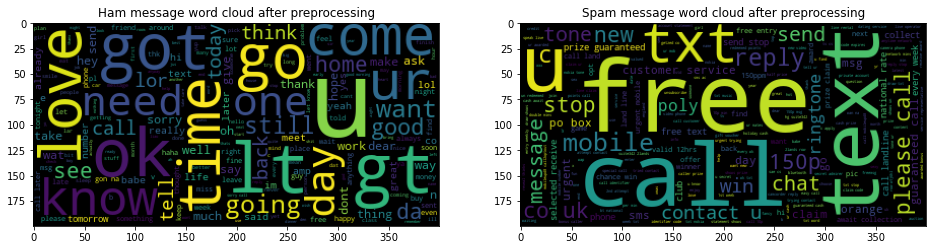

In [64]:
plt.figure(figsize =(16,12))

plt.subplot(1,2,1)
plt.title("Ham message word cloud after preprocessing")
plt.imshow(ham_wordCloud)

plt.subplot(1,2,2)
plt.title("Spam message word cloud after preprocessing")
plt.imshow(spam_wordCloud)

In [65]:
df['Message'][2]

'free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18'

In [66]:
# removing numbers
def rem_num(text):
    clean_text = re.sub(r'[^A-Za-z]',' ',text)
    return clean_text

df.Message = df.Message.apply(rem_num)
df.Message[2]

'free entry   wkly comp win fa cup final tkts   st may      text fa       receive entry question std txt rate c apply            over  '

In [67]:
# removing extra spaces 
def rem_space(text):
    clean_text = re.sub(' +',' ',text)
    return clean_text

df.Message = df.Message.apply(rem_space)
df.Message[2]

'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply over '

### Lemmatization

In [68]:

lm = nltk.WordNetLemmatizer()

tokenizer = nltk.word_tokenize # to tokenize

In [69]:
# Lemmatization function

def lemma(text):
    tokens = tokenizer(text)
    # print(f'Tokens : {tokens}')
    lemmatized = []

    for word in tokens:
        lemma_word = lm.lemmatize(word)
        lemmatized.append(lemma_word)
    # print(f"lemmatized = {lemmatized}")

    final_text = ' '.join(lemmatized)
    # print("final text : ",final_text)
    return final_text
    

In [70]:
df.Message = df.Message.apply(lemma)

In [71]:
df.Message

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry wkly comp win fa cup final tkts st ...
3                     u dun say early hor u c already say
4                     nah think go usf life around though
                              ...                        
5567    nd time tried contact u u pound prize claim ea...
5568                            b going esplanade fr home
5569                                 pity mood suggestion
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

### Bag of words

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english',max_features = 2500,ngram_range = (1,2))
scaled_X = cv.fit_transform(df.Message)

In [73]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names_out())
df_bow_sklearn.head()

,aathi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,ym,yo,yo yo,yoga,yogasana,yr,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df['Class'] = df['Class'].map({'spam':1,'ham':0})

In [75]:
# train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_bow_sklearn, df['Class'],test_size=0.3,random_state=42)

In [76]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [77]:
y_pred = clf.predict(X_test)

In [78]:
# metrics
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)


0.97188995215311

In [38]:
clf.score(X_train, y_train)

0.9997435897435898

In [79]:
clf.score(X_test, y_test)

0.97188995215311

### TF-IDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2500,ngram_range = (1,3))
scaled_X_tf = tfidf.fit_transform(df.Message)


In [81]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tfidf.get_feature_names_out())
df_tfidf_sklearn.head()

,aathi,abiola,able,abt,ac,acc,accept,access,account,account statement,...,yet,yijue,ym,yo,yoga,yogasana,yr,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_tfidf_sklearn, df['Class'],test_size=0.3,random_state=42)

In [83]:
from sklearn.ensemble import RandomForestClassifier
clf_tfidf = RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
clf_tfidf.score(X_train, y_train)

0.9997435897435898

In [85]:
clf_tfidf.score(X_test, y_test)

0.9802631578947368

# Word2Vec

In [86]:
# ! pip install gensim

In [87]:
df.head()

,Class,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


In [101]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
words=[]
classList=[]
for sent,classVal in zip(df['Message'],df['Class']):
    sent_token = sent_tokenize(sent)
    
    for sent in sent_token:
        words.append(simple_preprocess(sent))
        classList.append(classVal)

In [100]:
from gensim.utils import simple_preprocess

import gensim
import gensim.downloader as api
# wv=api.load('word2vec-google-news-300')


In [102]:
model = gensim.models.Word2Vec(words,window=5,min_count=2)

In [103]:
model.corpus_count

5564

In [104]:
df.shape

(5572, 2)

In [105]:
model.epochs

5

In [107]:
model.wv.similar_by_word('world')

[('tell', 0.9995361566543579),
 ('say', 0.9995178580284119),
 ('ur', 0.9995129704475403),
 ('back', 0.9995077848434448),
 ('one', 0.999504804611206),
 ('get', 0.9994989633560181),
 ('today', 0.9994961023330688),
 ('thing', 0.9994900226593018),
 ('friend', 0.9994874000549316),
 ('said', 0.9994815587997437)]